# Technical Analysis

## Project 2 Team 3

In [61]:
# Import Libraries and Dependencies

import pandas as pd
import numpy as np
from pathlib import Path
import ta
pd.set_option('display.max_columns', None)
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

# Import Data and Cleaning

In [62]:
csv_path = Path('BTC_USD.csv')
btc_df=pd.read_csv(csv_path)

In [63]:
# Set index as datetime object and drop extraneous columns
btc_df.set_index(pd.to_datetime(btc_df['Date'], infer_datetime_format=True), inplace=True)

In [64]:
# Drop NAs and calculate daily percent return
btc_df['daily_return'] = btc_df['Close'].dropna().pct_change()

In [65]:
# Add features from TA ;ibrary
btc_df = ta.add_all_ta_features(btc_df, "Open", "High", "Low", "Close", "Volumen", fillna=True)

In [66]:
# Check datframe
btc_df.head()

,Date,Close,Open,High,Low,Volumen,Change %,daily_return,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,-19094.758419,85240,-0.224012,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,19541.851219,1000.000000,11147.000000,0.0,11045.000000,11045.000000,11045.000000,0.000000,0.000000,0.0,0.0,11147.000000,12513.000000,9781.000000,24.508836,0.462665,0.0,0.0,10515.0,11881.0,11198.0,12.367587,0.387994,0.0,0.000000,0.000000,0.000000,11045.000000,11045.000000,11045.000000,11045.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,28.562038,1.000000,0.000000,-2061.300457,229.448953,229.448953,0.000000,11198.0,11198.0,11198.0,11198.0,8822.049954,8715.708181,4.0,4.0,0.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,0.000000,0.000000,38.799414,38.799414,-61.200586,0.0,11045.000000,0.0,0.000000,0.000000,0.000000,22.944895,0.000000,0.000000
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,-2358.823459,133790,-0.017631,2.092505e+07,100.000000,1.672091e+08,1.672091e+08,21452.755716,1039.022182,11215.100879,0.0,11260.500000,11691.500000,10829.500000,7.655077,0.750000,0.0,0.0,11240.833333,12538.833333,9942.833333,23.094373,0.590588,0.0,0.0,10515.0,11881.0,11198.0,12.130900,0.703514,0.0,34.381766,6.876353,27.505413,11260.500000,11260.500000,11111.307692,11076.925926,0.0,0.0,0.0,0.330482,0.298500,0.031982,0.007622,1.984007,66.666667,-2276.800457,253.436844,241.442899,11.993945,11198.0,11198.0,11198.0,11198.0,8822.049954,8715.708181,8.0,4.0,4.0,-1.0,-1.0,0.0,0.0,0.0,100.000000,0.0,0.0,0.0,100.000000,31.856703,70.351391,54.575403,-29.648609,0.0,11232.763970,0.0,-3.546727,-0.709345,-2.837381,3.902218,3.828006,3.902218
2018-01-20,20-Jan-18,12728.0,11462.0,13002.0,11425.0,46300,10.91%,0.109097,27852.146737,180090,0.154657,2.621684e+07,100.000000,3.234042e+09,1.700626e+09,6945.729445,1152.376641,11515.874544,0.0,11749.666667,13177.291579,10322.041755,24.300688,0.842644,0.0,0.0,11622.222222,13013.222222,10231.222222,23.936902,0.897476,0.0,0.0,10515.0,13002.0,11758.5,21.166558,0.889827,0.0,160.801877,37.661458,123.140419,11749.666667,11749.666667,11360.029586,11199.227709,0.0,0.0,0.0,0.651614,0.295566,0.356047,0.042143,2.999166,100.000000,-2765.967124,307.887314,263.591037,44.296277,11758.5,11758.5,11758.5,11758.5,8822.049954,8715.708181,12.0,4.0,8.0,-1.0,11881.0,0.0,1.0,0.0,100.000000,0.0,0.0,0.0,100.000000,51.042416,88.982710,66.044505,-11.017290,0.0,11829.418930,0.0,-6.721114,-1.911699,-4.809415,10.909725,10.354639,15.237664
2018-01-21,21-Jan-18,11514.0,12732.0,12732.0,11020.0,53620,-9.54%,-0.095380,5176.399074,126470,0.022149,1.317234e+07,64.064711,-1.077583e+09,7.745561e+08,-63.087245,1152

<AxesSubplot:title={'center':'Bitcoin Closing Price'}, xlabel='Date'>

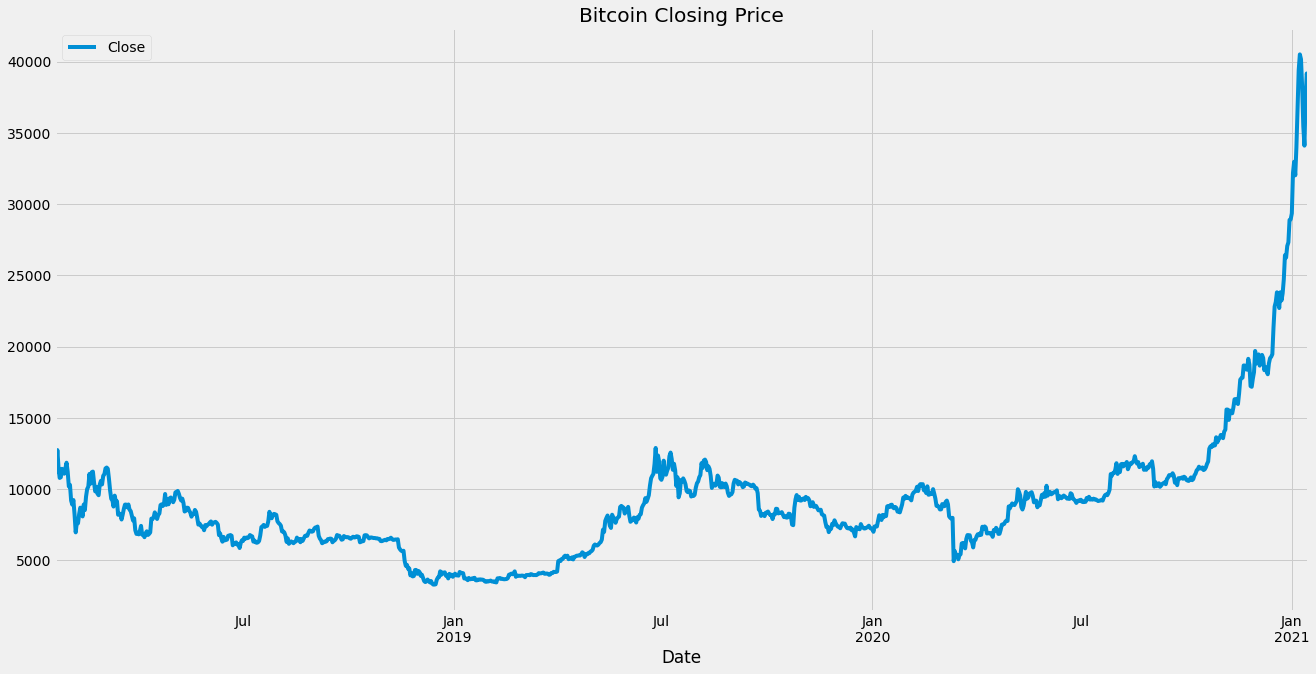

In [67]:
# Plot Bitcoin Closing Prices
btc_df[['Close']].plot(figsize=(20,10), title="Bitcoin Closing Price")

# Construct Technical Analysis Trading Signals and Charts for the different indicators 

# Exponential Moving Average (EMA)

<AxesSubplot:title={'center':'Exponential Moving Average of Closing Prices'}, xlabel='Date'>

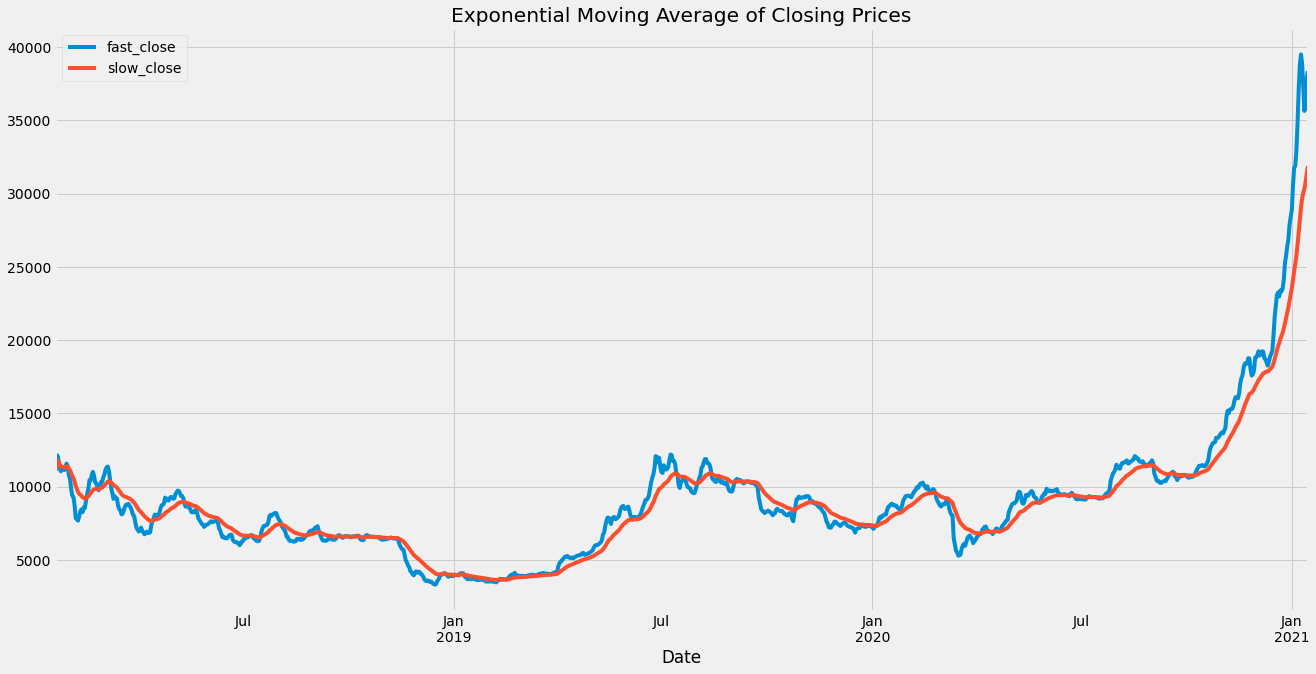

In [68]:
# Set short and long windows
short_window = 1
long_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_close'] = btc_df['Close'].ewm(halflife=short_window).mean()
btc_df['slow_close'] = btc_df['Close'].ewm(halflife=long_window).mean()

# Construct a crossover trading signal
btc_df['ema_long'] = np.where(btc_df['fast_close'] > btc_df['slow_close'], 1.0, 0.0)
btc_df['ema_short'] = np.where(btc_df['fast_close'] < btc_df['slow_close'], -1.0, 0.0)
btc_df['ema_signal'] = btc_df['ema_long'] + btc_df['ema_short']

#Plot EMA
btc_df[['fast_close', 'slow_close']].plot(figsize=(20,10), title='Exponential Moving Average of Closing Prices')

# Exponential Moving Average of Daily Return Volatility (EMV)

In [69]:
# Set short and long volatility windows
short_vol_window = 1
long_vol_window = 10

# Construct a `Fast` and `Slow` Exponential Moving Average from short and long windows, respectively
btc_df['fast_vol'] = btc_df['daily_return'].ewm(halflife=short_vol_window).std()
btc_df['slow_vol'] = btc_df['daily_return'].ewm(halflife=long_vol_window).std()

# Construct a crossover trading signal
btc_df['emv_long'] = np.where(btc_df['fast_vol'] < btc_df['slow_vol'], 1.0, 0.0)
btc_df['emv_short'] = np.where(btc_df['fast_vol'] > btc_df['slow_vol'], -1.0, 0.0) 
btc_df['emv_signal'] = btc_df['emv_long'] + btc_df['emv_short']

<AxesSubplot:title={'center':'Exponential Moving Average of Return Volatility'}, xlabel='Date'>

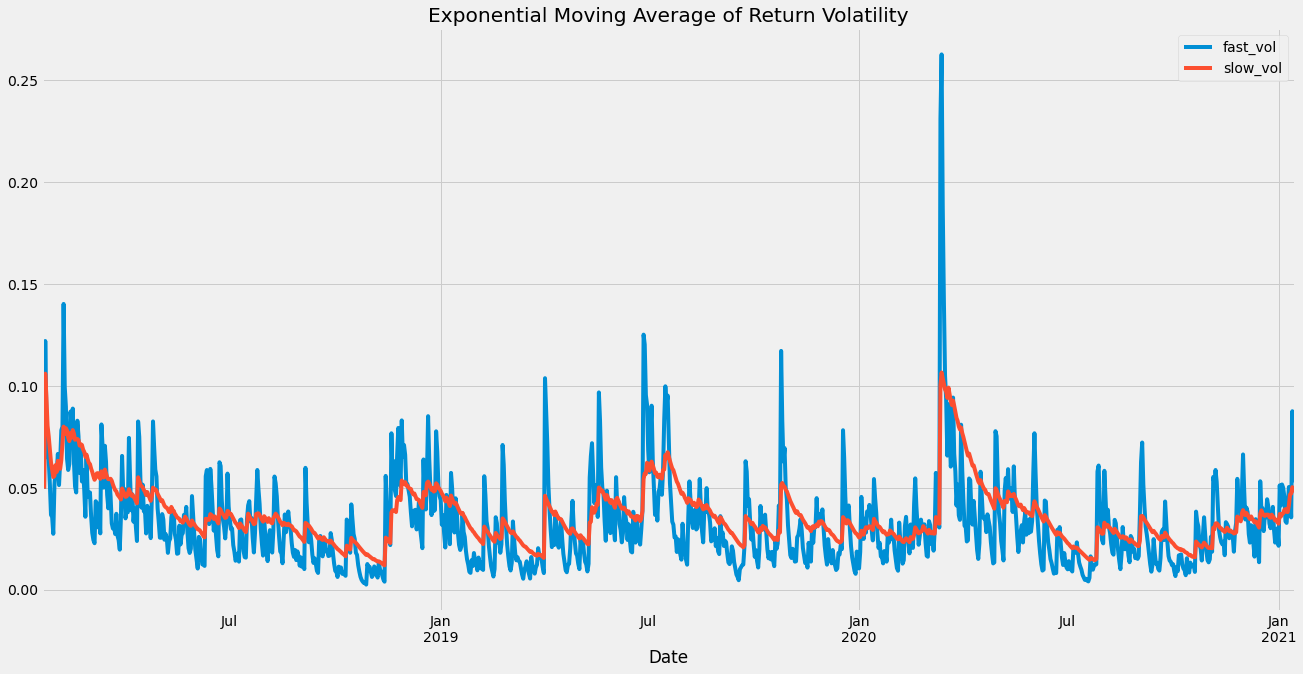

In [70]:
# Plot EMV
btc_df[['fast_vol', 'slow_vol']].plot(figsize=(20,10), title='Exponential Moving Average of Return Volatility')

# Bollinger Bands (BB)

In [71]:
# Set bollinger band window
bollinger_window = 20

# Calculate rolling mean and standard deviation
btc_df['bollinger_mid_band'] = btc_df['Close'].rolling(window=bollinger_window).mean()
btc_df['bollinger_std'] = btc_df['Close'].rolling(window=20).std()

# Calculate upper and lowers bands of bollinger band
btc_df['bollinger_upper_band']  = btc_df['bollinger_mid_band'] + (btc_df['bollinger_std'] * 1)
btc_df['bollinger_lower_band']  = btc_df['bollinger_mid_band'] - (btc_df['bollinger_std'] * 1)

# Calculate bollinger band trading signal
btc_df['bb_long'] = np.where(btc_df['Close'] < btc_df['bollinger_lower_band'], 1.0, 0.0)
btc_df['bb_short'] = np.where(btc_df['Close'] > btc_df['bollinger_upper_band'], -1.0, 0.0)
btc_df['bb_signal'] = btc_df['bb_long'] + btc_df['bb_short']


<AxesSubplot:title={'center':'Bollinger Bands'}, xlabel='Date'>

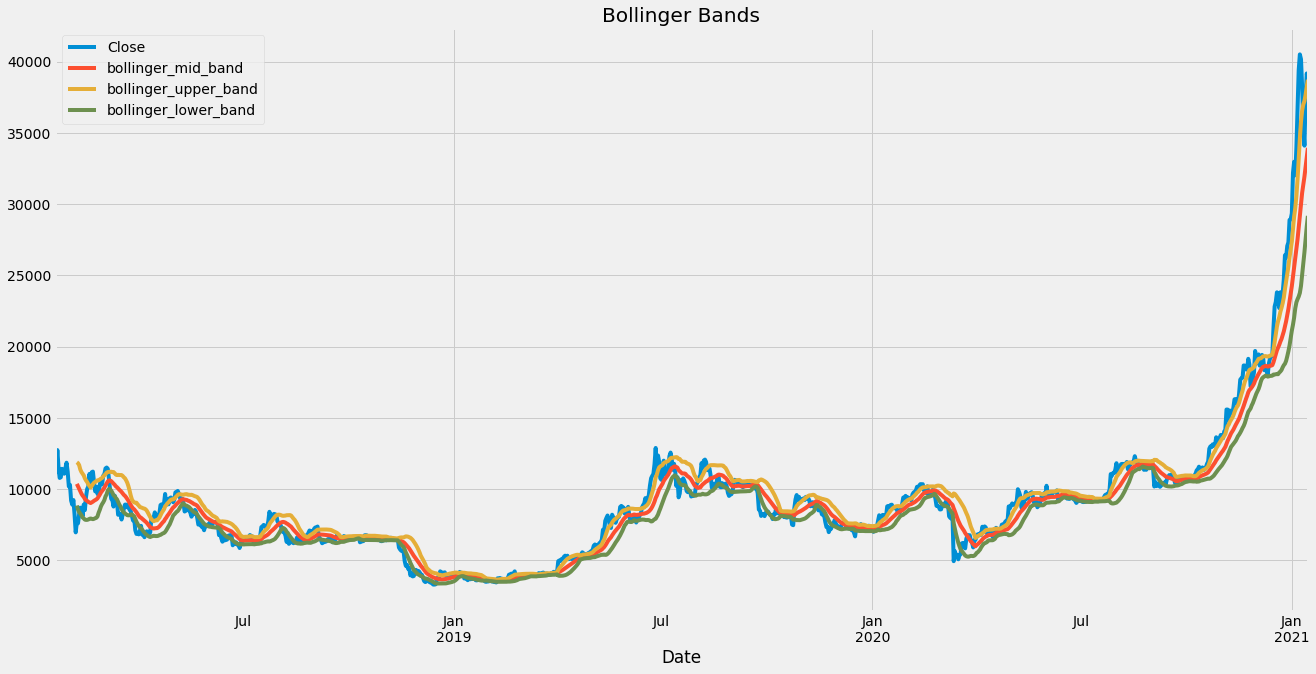

In [72]:
#Plot BB
btc_df[['Close','bollinger_mid_band','bollinger_upper_band','bollinger_lower_band']].plot(figsize=(20,10), title='Bollinger Bands')

# Moving Average Convergence Divergence (MACD)

In [73]:
#Calculate the Short Term Exponential Moving Average
ShortEMA = btc_df.Close.ewm(span=12, adjust=False).mean() #AKA Fast moving average
#Calculate the Long Term Exponential Moving Average
LongEMA = btc_df.Close.ewm(span=26, adjust=False).mean() #AKA Slow moving average
#Calculate the Moving Average Convergence/Divergence (MACD)
MACD = ShortEMA - LongEMA
#Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

In [74]:
#Create new columns for the data frame 
btc_df['MACD'] = MACD
btc_df['Signal Line'] = signal

In [75]:
#Calculate MACD trading Signals
btc_df['macd_long'] = np.where(btc_df['MACD'] > btc_df['Signal Line'], 1.0, 0.0)
btc_df['macd_short'] = np.where(btc_df['MACD'] < btc_df['Signal Line'], -1.0, 0.0)
btc_df['macd_signal'] = btc_df['macd_long'] + btc_df['macd_short']

<AxesSubplot:title={'center':'MACD'}, xlabel='Date'>

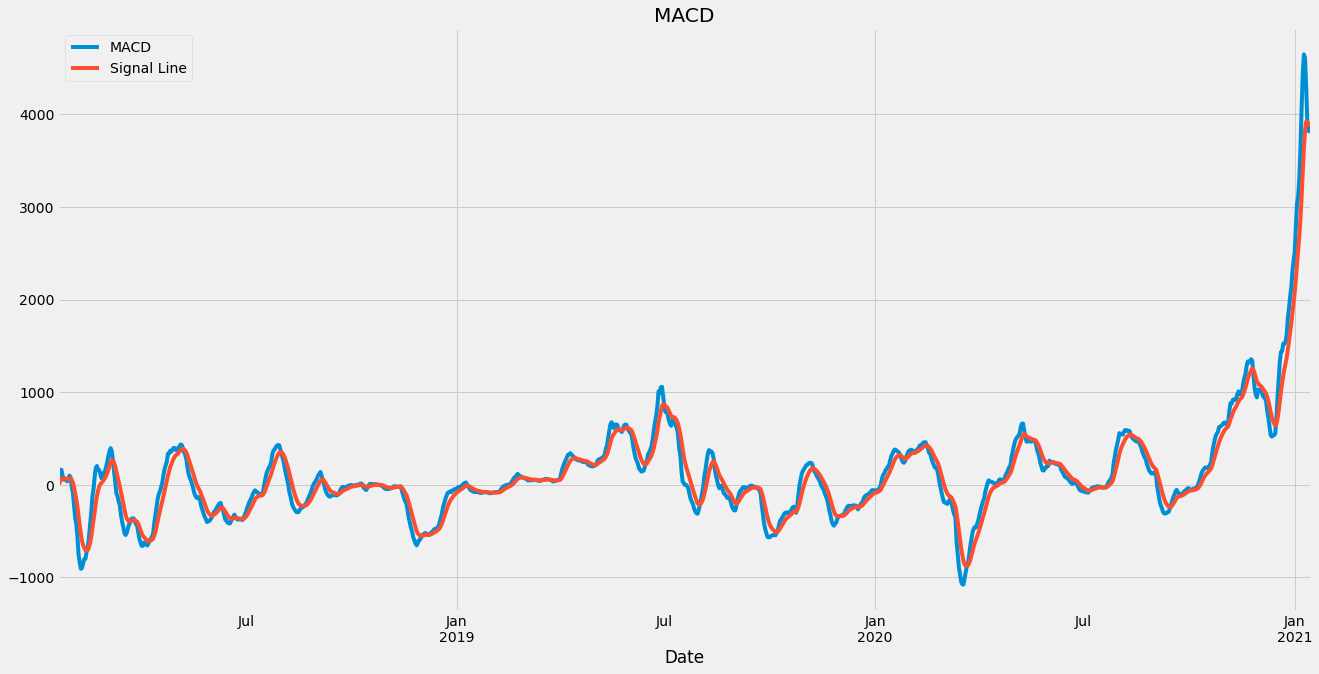

In [76]:
#Plot MACD
btc_df[['MACD','Signal Line']].plot(figsize=(20,10), title = "MACD")

# Relative Strengh Index (RSI)

In [77]:
delta = btc_df['Close'].diff(1) #Use diff() function to find the discrete difference over the column axis with period value equal to 1
delta = delta.dropna() # or delta[1:]
up =  delta.copy() #Make a copy of this object's indices and data
down = delta.copy() #Make a copy of this object's indices and data
up[up < 0] = 0 
down[down > 0] = 0 
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0/ (1.0 + RS))

In [78]:
btc_df["RSI"] = RSI

In [79]:
#Calculate RSI Trading Signal
btc_df['rsi_long'] = np.where(btc_df['RSI'] < 30, 1.0, 0.0)
btc_df['rsi_short'] = np.where(btc_df['RSI'] > 70, -1.0, 0.0)
btc_df['rsi_signal'] = btc_df['rsi_long'] + btc_df['rsi_short']

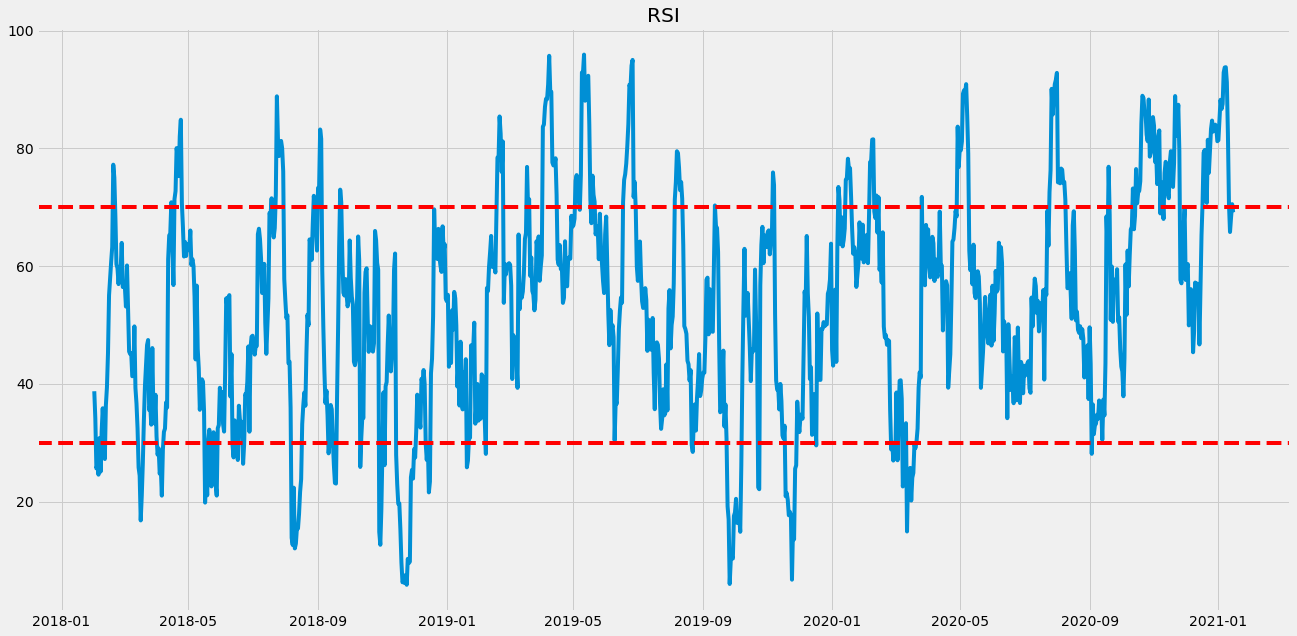

In [80]:
# Plot RSI
new_df = pd.DataFrame()
new_df['RSI'] = RSI
plt.figure(figsize=(20,10))
plt.title('RSI')
plt.plot(new_df.index, new_df['RSI'])
plt.axhline(30, linestyle='--',color = 'red')
plt.axhline(70, linestyle='--', color = 'red')

# Chaikin Money Flow (CMF)

In [81]:
# Calculate Trading Signal
btc_df['cmf_long'] = np.where(btc_df['volume_cmf'] > 0, 1.0, 0.0)
btc_df['cmf_short'] = np.where(btc_df['volume_cmf'] < 0, -1.0, 0.0)
btc_df['cmf_signal'] = btc_df['cmf_long'] + btc_df['cmf_short']


<AxesSubplot:title={'center':'CMF'}, xlabel='Date'>

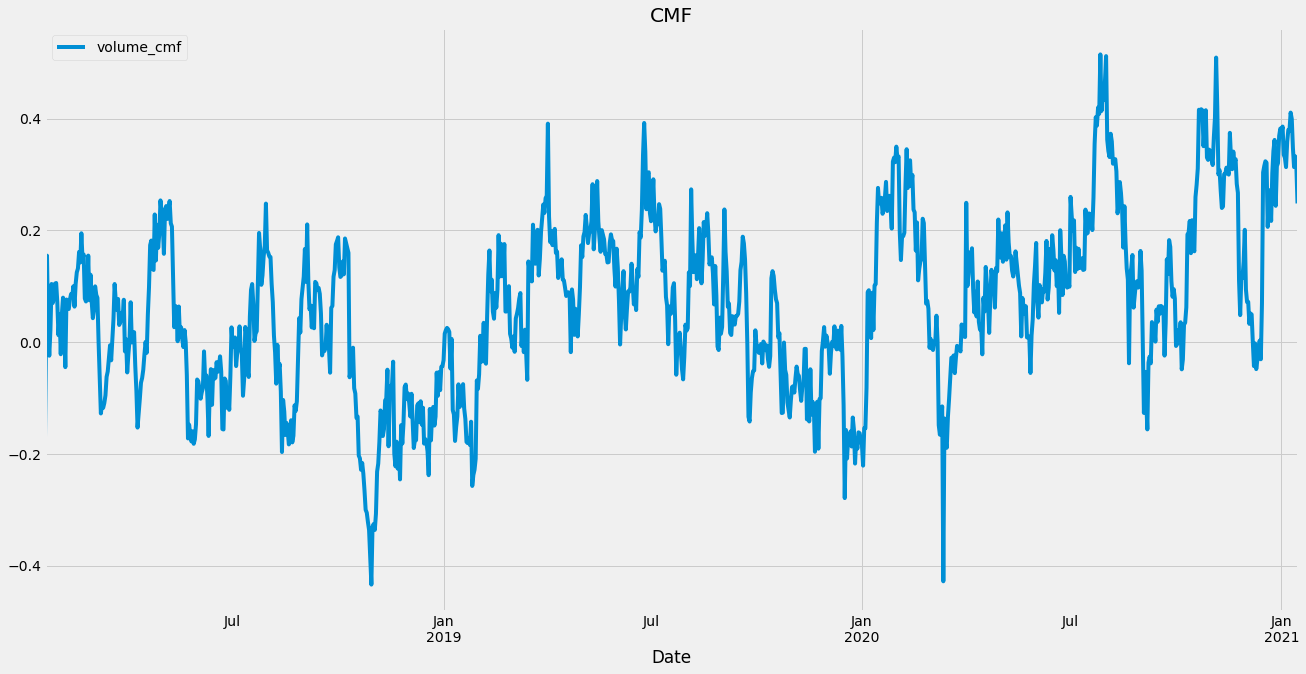

In [82]:
# Plot CMF
btc_df[['volume_cmf']].plot(figsize=(20,10), title="CMF")


In [106]:
#ICHIMOKU

In [107]:
# Calculate Trading Signal
btc_df['ichi_long'] = np.where(btc_df['trend_ichimoku_a'] > btc_df['trend_ichimoku_b'], 1.0, 0.0)
btc_df['ichi_short'] = np.where(btc_df['trend_ichimoku_a'] < btc_df['trend_ichimoku_b'], -1.0, 0.0)
btc_df['ichi_signal'] = btc_df['ichi_long'] + btc_df['ichi_short']

<AxesSubplot:title={'center':'Ichimoku|'}, xlabel='Date'>

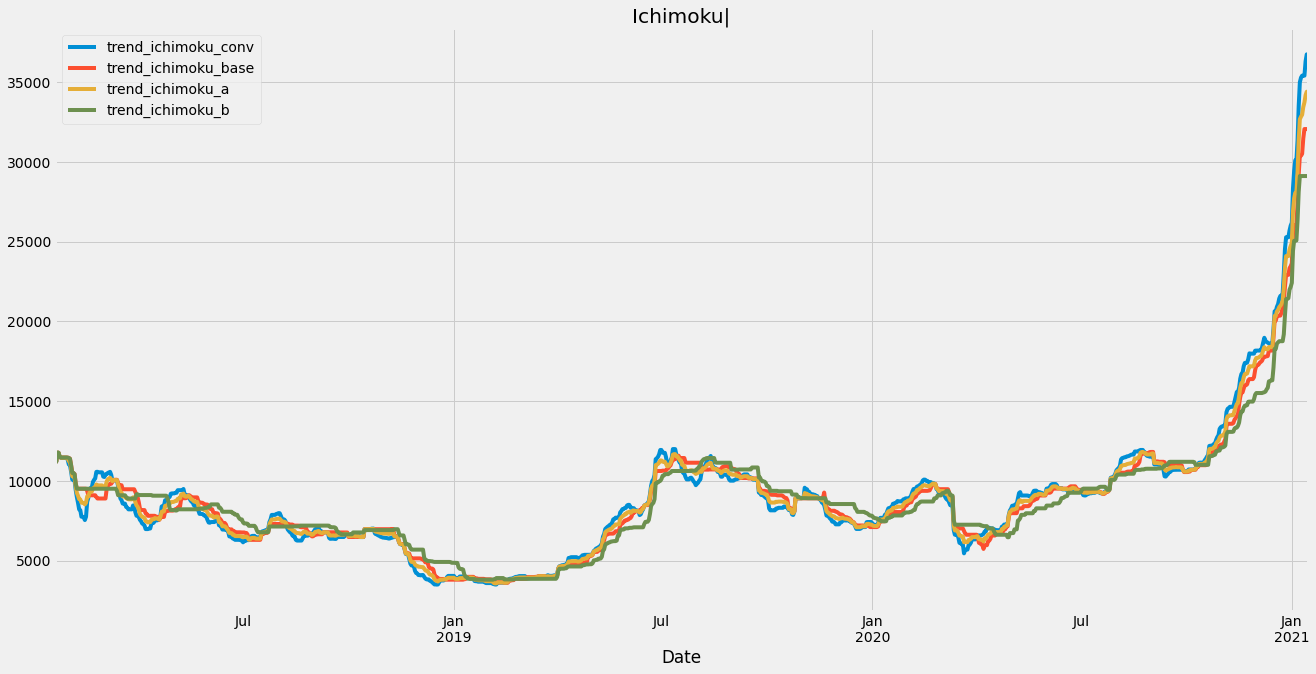

In [108]:
# Plot Ichimoku
btc_df[['trend_ichimoku_conv','trend_ichimoku_base','trend_ichimoku_a','trend_ichimoku_b']].plot(figsize=(20,10), title="Ichimoku|")

# Keltner Channel

In [124]:
# Calculate Trading Signal
btc_df['kel_long'] = np.where(btc_df['volatility_kchi'] >1, 1.1, 0.0)
btc_df['kel_short'] = np.where(btc_df['volatility_kcli'] <0.2, -1.0, 0.0)
btc_df['kel_signal'] = btc_df['kel_long'] + btc_df['kel_short']

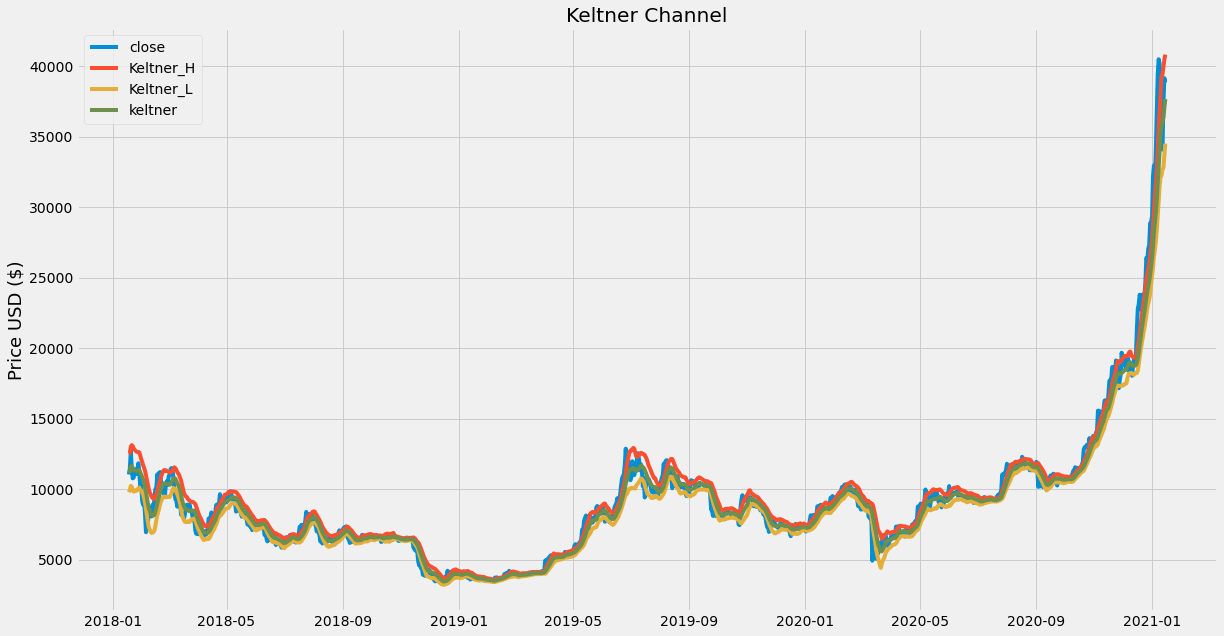

In [128]:
# Plot Keltner
keltner_df = pd.DataFrame()
keltner_df['close'] = btc_df['close']
keltner_df['Keltner_H'] =btc_df['volatility_kch']
keltner_df['Keltner_L'] =btc_df['volatility_kcl']
keltner_df['keltner'] = btc_df['volatility_kcc']
plt.figure(figsize=(18.2,10))
plt.plot(keltner_df.index, keltner_df['close'])
plt.plot(keltner_df['Keltner_H'])
plt.plot(keltner_df['Keltner_L'])
plt.plot(keltner_df['keltner'])
#,keltner_df['Low'],keltner_df['keltner'])
plt.title('Keltner Channel')
plt.ylabel('Price USD ($)',fontsize=18)
plt.legend(keltner_df.columns.values, loc='upper left')
plt.show()

# Aroon Indicator

In [132]:
# Calculte trading signal
btc_df['aro_long'] = np.where(btc_df['trend_aroon_up'] > btc_df['trend_aroon_down'], 1.0, 0.0)
btc_df['aro_short'] = np.where(btc_df['trend_aroon_up'] < btc_df['trend_aroon_down'], -1.0, 0.0)
btc_df['aro_signal'] = btc_df['aro_long'] + btc_df['aro_short']


<AxesSubplot:title={'center':'Aroon Indicator'}, xlabel='Date'>

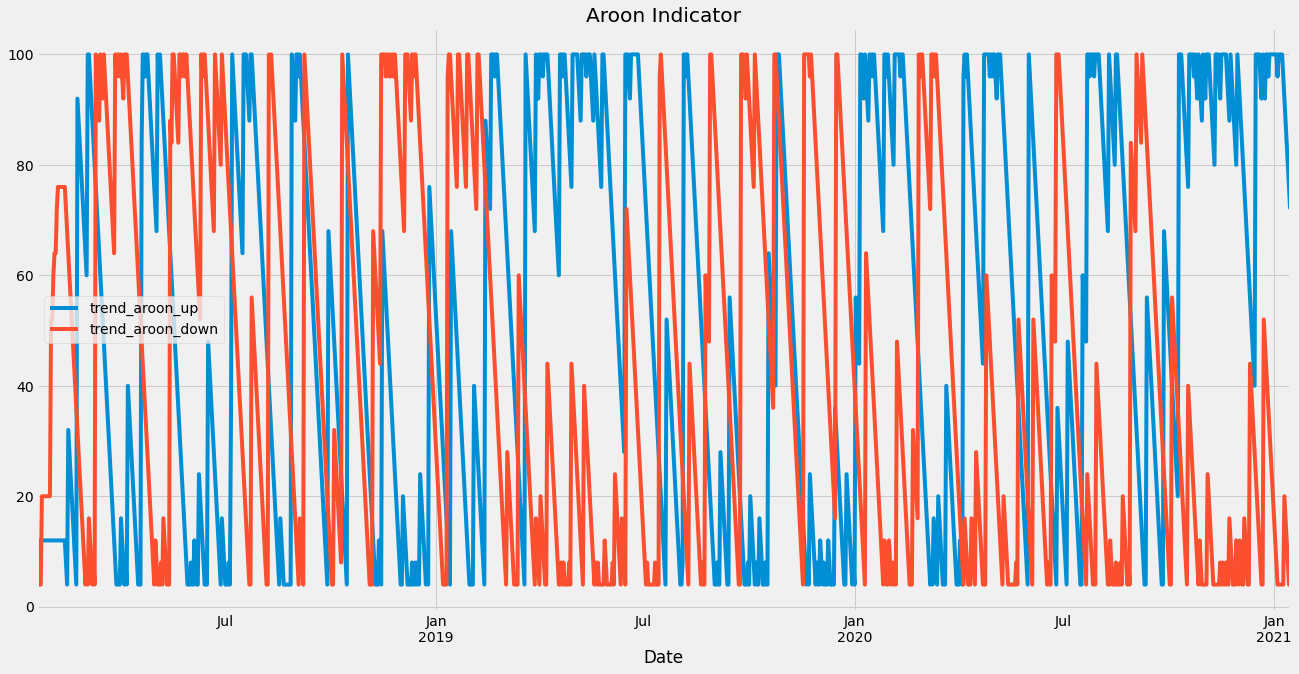

In [177]:
# Plot Aroon
btc_df[['trend_aroon_up','trend_aroon_down']].plot(figsize=(20,10), title="Aroon Indicator")

# Vortex Indicator

In [147]:
#Calculate trading signal
btc_df['vor_long'] = np.where(btc_df['trend_vortex_ind_diff'] >= 1, 1.0, 0.0)
btc_df['vor_short'] = np.where(btc_df['trend_vortex_ind_diff'] < 0, -1.0, 0.0)
btc_df['vor_signal'] = btc_df['vor_long'] + btc_df['vor_short']

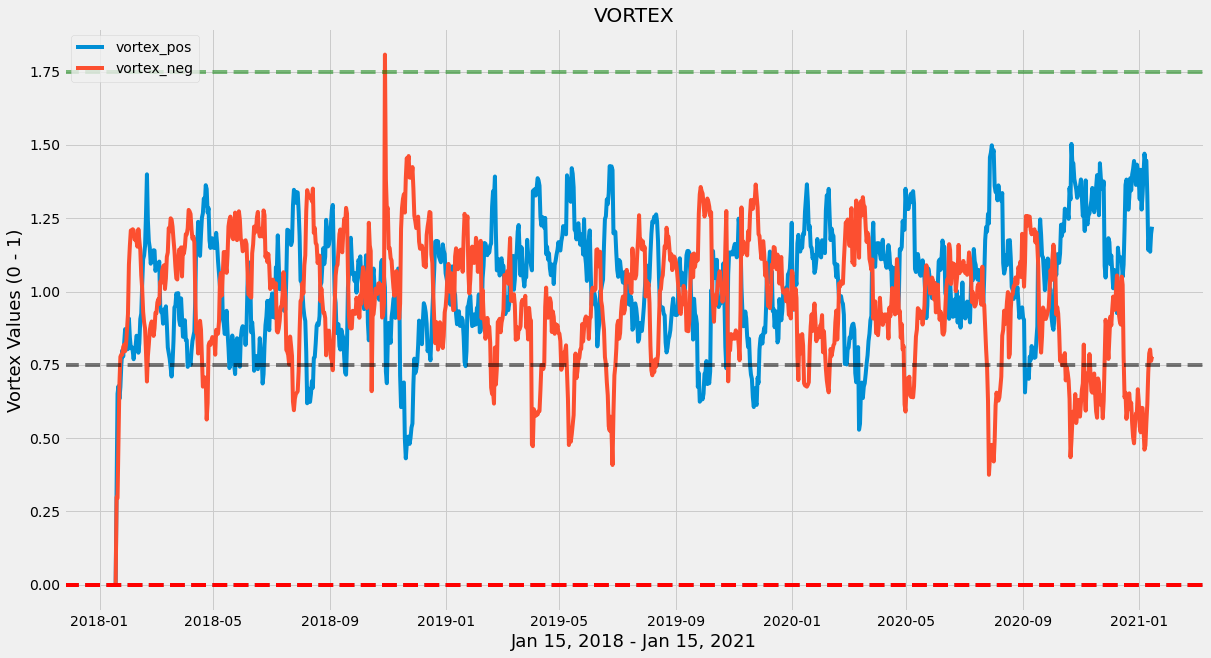

In [178]:
#Plot Vortex
vortex_df = pd.DataFrame()
vortex_df['Vortex'] = btc_df['trend_vortex_ind_diff']
vortex_df['vortex_pos']= btc_df['trend_vortex_ind_pos']
vortex_df['vortex_neg']= btc_df['trend_vortex_ind_neg']
plt.figure(figsize=(18.2,10))
vortex_df = vortex_df.drop(columns=['Vortex'])
plt.title('VORTEX')
plt.plot(vortex_df.index, vortex_df['vortex_pos'],vortex_df['vortex_neg'])
plt.legend(vortex_df.columns.values, loc='upper left')
plt.axhline(0, linestyle='--', alpha=0.5, color = 'black')
plt.axhline(1.75, linestyle='--', alpha=0.5, color = 'green')
plt.axhline(0, linestyle='--',color = 'red')
plt.axhline(0.75, linestyle='--', alpha=0.5, color = 'black')
plt.xlabel('Jan 15, 2018 - Jan 15, 2021',fontsize=18)
plt.ylabel('Vortex Values (0 - 1)',fontsize=18)
plt.show()

# Dataframe with OHLCV and Trading Signals

In [149]:
btc_df

,date,close,open,high,low,volumen,change %,daily_return,volume_adi,volume_obv,volume_cmf,volume_fi,volume_mfi,volume_em,volume_sma_em,volume_vpt,volume_nvi,volume_vwap,volatility_atr,volatility_bbm,volatility_bbh,volatility_bbl,volatility_bbw,volatility_bbp,volatility_bbhi,volatility_bbli,volatility_kcc,volatility_kch,volatility_kcl,volatility_kcw,volatility_kcp,volatility_kchi,volatility_kcli,volatility_dcl,volatility_dch,volatility_dcm,volatility_dcw,volatility_dcp,volatility_ui,trend_macd,trend_macd_signal,trend_macd_diff,trend_sma_fast,trend_sma_slow,trend_ema_fast,trend_ema_slow,trend_adx,trend_adx_pos,trend_adx_neg,trend_vortex_ind_pos,trend_vortex_ind_neg,trend_vortex_ind_diff,trend_trix,trend_mass_index,trend_cci,trend_dpo,trend_kst,trend_kst_sig,trend_kst_diff,trend_ichimoku_conv,trend_ichimoku_base,trend_ichimoku_a,trend_ichimoku_b,trend_visual_ichimoku_a,trend_visual_ichimoku_b,trend_aroon_up,trend_aroon_down,trend_aroon_ind,trend_psar_up,trend_psar_down,trend_psar_up_indicator,trend_psar_down_indicator,trend_stc,momentum_rsi,momentum_stoch_rsi,momentum_stoch_rsi_k,momentum_stoch_rsi_d,momentum_tsi,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,fast_close,slow_close,ema_long,ema_short,ema_signal,fast_vol,slow_vol,emv_long,emv_short,emv_signal,bollinger_mid_band,bollinger_std,bollinger_upper_band,bollinger_lower_band,bb_long,bb_short,bb_signal,macd,signal line,macd_long,macd_short,macd_signal,rsi,rsi_long,rsi_short,rsi_signal,cmf_long,cmf_short,cmf_signal,ichi_long,ichi_short,ichi_signal,kel_long,kel_short,kel_signal,aro_long,aro_short,aro_signal,vor_long,vor_short,vor_signal
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-18,18-Jan-18,11045.0,11101.0,11881.0,10515.0,85240,-0.33%,NaN,-19094.758419,85240,-0.224012,0.000000e+00,50.000000,0.000000e+00,0.000000e+00,19541.851219,1000.000000,11147.000000,0.000000,11045.000000,11045.000000,11045.000000,0.000000,0.000000,0.0,0.0,11147.000000,12513.000000,9781.000000,24.508836,0.462665,0.0,0.0,10515.0,11881.0,11198.0,12.367587,0.387994,0.000000,0.000000,0.000000,0.000000,11045.000000,11045.000000,11045.000000,11045.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.562038,1.000000,0.000000,-2061.300457,229.448953,229.448953,0.000000,11198.00,11198.0,11198.000,11198.0,8822.049954,8715.708181,4.0,4.0,0.0,-1.000000,-1.0,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.799414,38.799414,-61.200586,0.000000,11045.000000,0.000000,0.000000,0.000000,0.000000,22.944895,0.000000,0.000000,11045.000000,11045.000000,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-19,19-Jan-18,11476.0,11036.0,11879.0,10649.0,48550,3.90%,0.039022,-2358.823459,133790,-0.017631,2.092505e+07,100.000000,1.672091e+08,1.672091e+08,21452.755716,1039.022182,11215.100879,0.000000,11260.500000,11691.500000,10829.500000,7.655077,0.750000,0.0,0.0,11240.833333,12538.833333,9942.833333,23.094373,0.590588,0.0,0.0,10515.0,11881.0,11198.0,12.130900,0.703514,0.000000,34.381766,6.876353,27.505413,11260.500000,11260.500000,11111.307692,11076.925926,0.000000,0.000000,0.000000,0.330482,0.298500,0.031982,0.007622,1.984007,66.666667,-2276.800457,253.436844,241.442899,11.993945,11198.00,11198.0,11198.000,11198.0,8822.049954,8715.708181,8.0,4.0,4.0,-1.000000,-1.0,0.0,0.0,0.000000,100.000000,0.000000,0.000000,0.000000,100.000000,31.856703,70.351391,54.575403,-29.648609,0.000000,11232.763970,0.000000,-3.546727,-0.709345,-2.837381,3.902218,3.828006,3.902218,11332.333333,11267.965672,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,34.381766,6.876353,1.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0

In [179]:
ts_df = btc_df[['close','open','high','low','volumen', 'daily_return',
             'ema_signal','emv_signal','bb_signal','macd_signal',
                'rsi_signal','cmf_signal','ichi_signal',
                'kel_signal','aro_signal','vor_signal'
               ]].dropna()

In [180]:
ts_df

,close,open,high,low,volumen,daily_return,ema_signal,emv_signal,bb_signal,macd_signal,rsi_signal,cmf_signal,ichi_signal,kel_signal,aro_signal,vor_signal
Date,,,,,,,,,,,,,,,,
2018-01-19,11476.0,11036.0,11879.0,10649.0,48550,0.039022,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0
2018-01-20,12728.0,11462.0,13002.0,11425.0,46300,0.109097,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0
2018-01-21,11514.0,12732.0,12732.0,11020.0,53620,-0.095380,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0
2018-01-22,10771.0,11519.0,11886.0,10009.0,66350,-0.064530,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0
2018-01-23,10819.0,10770.0,11383.0,9901.1,63850,0.004456,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-11,35476.0,38226.0,38226.0,31842.0,48040,-0.071941,1.0,-1.0,0.0,1.0,-1.0,1.0,1.0,-1.0,0.0,0.0
2021-01-12,34103.0,35448.0,35838.6,33616.0,22180,-0.038702,1.0,1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0
2021-01-13,37375.0,34106.0,37418.0,33160.0,14890,0.095945,1.0,-1.0,0.0,-1.0,0.0,1.0,1.0,-1.0,0.0,0.0


# Random Forest Training

In [206]:
# Set x variable list of features
x_var = ['ema_signal','emv_signal','bb_signal','macd_signal',
                'rsi_signal','cmf_signal','ichi_signal',
                'kel_signal','aro_signal','vor_signal']

In [207]:
# Shift DataFrame values by 1
ts_df[x_var] = ts_df[x_var].shift(1)

In [208]:
# Drop NAs and replace positive/negative infinity values
ts_df.dropna(subset=x_var, inplace=True)
ts_df.dropna(subset=['daily_return'], inplace=True)
ts_df = ts_df.replace([np.inf, -np.inf], np.nan)
ts_df.head()

,close,open,high,low,volumen,daily_return,ema_signal,emv_signal,bb_signal,macd_signal,rsi_signal,cmf_signal,ichi_signal,kel_signal,aro_signal,vor_signal,Positive Return
Date,,,,,,,,,,,,,,,,,
2018-01-24,11414.0,10811.0,11529.0,10454.0,43820,0.054996,1.0,0.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,0.0,1.0
2018-01-25,11146.0,11402.0,11723.0,10857.0,34440,-0.023480,1.0,0.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0
2018-01-26,11070.0,11144.0,11647.0,10298.0,56750,-0.006819,1.0,-1.0,0.0,1.0,0.0,1.0,0.0,-1.0,0.0,0.0,0.0
2018-01-27,11461.0,11068.0,11683.0,10822.0,34400,0.035321,-1.0,1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,0.0,-1.0,1.0
2018-01-28,11839.0,11455.1,12181.0,11398.0,29620,0.032981,-1.0,1.0,0.0,-1.0,0.0,1.0,0.0,-1.0,0.0,-1.0,1.0


In [209]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
ts_df['Positive Return'] = np.where(ts_df['daily_return'] > 0, 1.0, 0.0)

In [210]:
# Construct training start and end dates
training_start = ts_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2020-09-14'

# Construct testing start and end dates
testing_start =  '2020-09-15'
testing_end = ts_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2018-01-24
Training End: 2020-09-14
Testing Start: 2020-09-15
Testing End: 2021-01-15


In [211]:
# Construct the X_train and y_train datasets
X_train = ts_df[x_var][training_start:training_end]
y_train = ts_df['Positive Return'][training_start:training_end]

In [212]:
# Construct the X test and y test datasets
X_test = ts_df[x_var][testing_start:testing_end]
y_test = ts_df['Positive Return'][testing_start:testing_end]

In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [219]:
# Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = predictions
Results

,Positive Return,Predicted Value
Date,,
2020-09-15,1.0,0.0
2020-09-16,1.0,0.0
2020-09-17,0.0,0.0
2020-09-18,0.0,0.0
2020-09-19,1.0,0.0
...,...,...
2021-01-11,0.0,1.0
2021-01-12,0.0,1.0
2021-01-13,1.0,1.0


In [216]:
from joblib import dump, load
dump(model, 'random_forest_model_pro2.joblib')

['random_forest_model_pro2.joblib']

In [227]:
Results["Return"] = ts_df['daily_return']

In [229]:
Results['Predicted Value'].replace(0, -1, inplace=True)
Results

,Positive Return,Predicted Value,Return
Date,,,
2020-09-15,1.0,-1.0,0.010387
2020-09-16,1.0,-1.0,0.016143
2020-09-17,0.0,-1.0,-0.001121
2020-09-18,0.0,-1.0,-0.000164
2020-09-19,1.0,-1.0,0.012941
...,...,...,...
2021-01-11,0.0,1.0,-0.071941
2021-01-12,0.0,1.0,-0.038702
2021-01-13,1.0,1.0,0.095945


<AxesSubplot:xlabel='Date'>

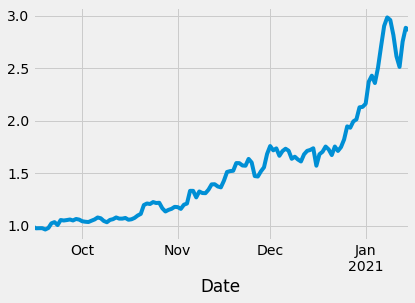

In [230]:
(1 + (Results['Return'] * Results['Predicted Value'])).cumprod().plot()

<AxesSubplot:xlabel='Date'>

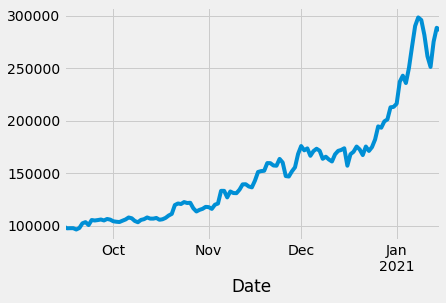

In [231]:
# Set initial capital allocation
initial_capital = 100000

# Plot cumulative return of model in terms of capital
cumulative_return_capital = initial_capital * (1 + (Results['Return'] * Results['Predicted Value'])).cumprod()
cumulative_return_capital.plot()